In [ ]:
#https://keras.io/api/applications/

from keras.applications import ResNet50, Xception
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.Xception import preprocess_input, decode_predictions

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = ResNet50()
model1 = Xception()

In [54]:
model.summary()
model1.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_5[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

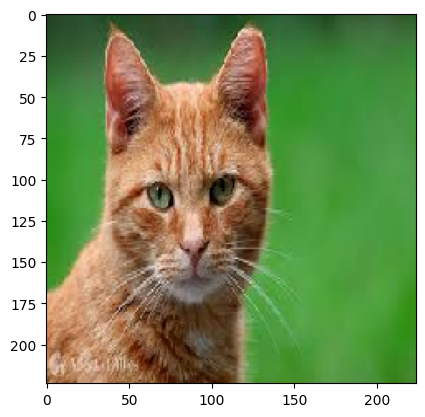

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1. tiger_cat: 0.5841
2. tabby: 0.2331
3. Egyptian_cat: 0.0893
4. lynx: 0.0396
5. mink: 0.0080


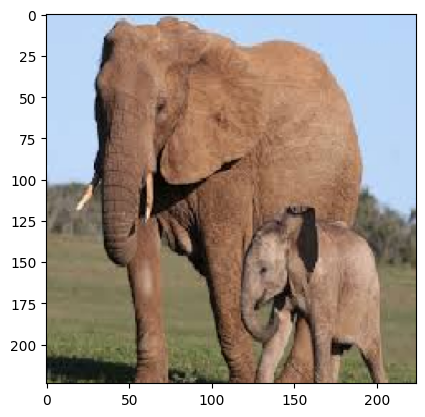

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1. tusker: 0.4551
2. African_elephant: 0.3958
3. Indian_elephant: 0.1409
4. whippet: 0.0017
5. Saluki: 0.0012


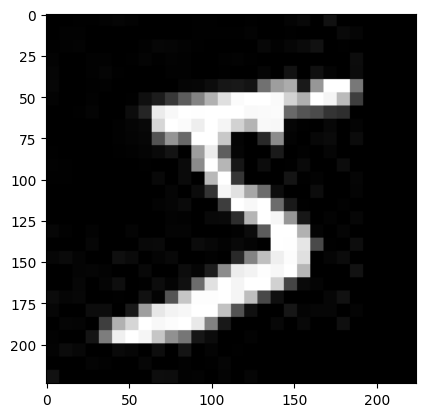

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1. digital_clock: 0.6234
2. scoreboard: 0.1734
3. crossword_puzzle: 0.1570
4. digital_watch: 0.0117
5. Bouvier_des_Flandres: 0.0050


In [56]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
for pic in ['cat.jpeg', 'elephant.jpeg', 'five.jpg']:
    img = image.load_img(pic, target_size=(224, 224))
    plt.imshow(img)
    plt.show()
    # Convert the image to a numpy array
    x = image.img_to_array(img)

    # Expand dimensions to match the expected input shape: (1, 224, 224, 3)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    x = preprocess_input(x)
    decoded = decode_predictions(preds, top=5)[0]

    for i, (imagenet_id, label, score) in enumerate(decoded):
        print(f"{i+1}. {label}: {score:.4f}")

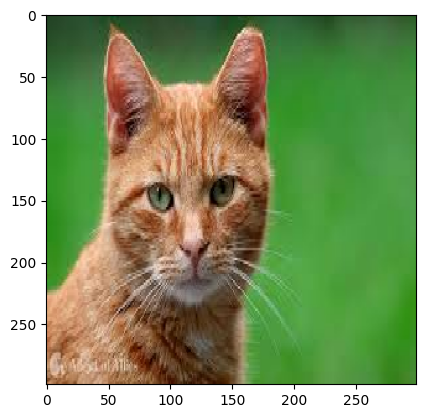

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. tiger_cat: 0.3319
2. Egyptian_cat: 0.3115
3. tabby: 0.1852
4. lynx: 0.0175
5. window_screen: 0.0028


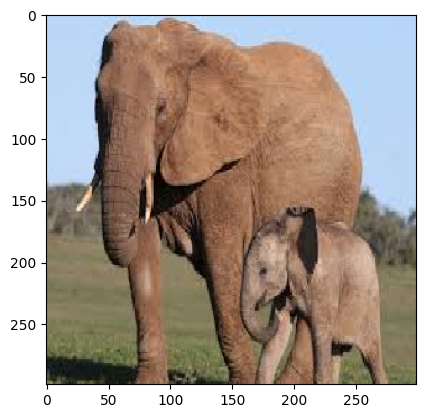

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1. Indian_elephant: 0.3738
2. African_elephant: 0.2022
3. tusker: 0.1953
4. komondor: 0.0015
5. Mexican_hairless: 0.0009


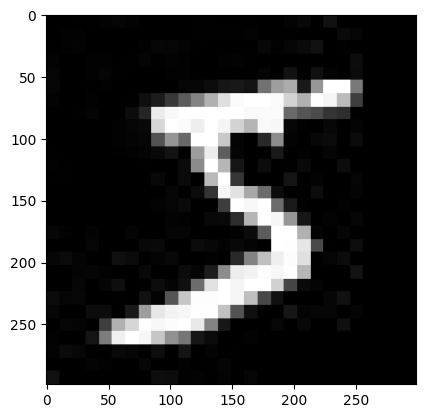

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1. pick: 0.0338
2. nematode: 0.0267
3. corkscrew: 0.0265
4. power_drill: 0.0223
5. revolver: 0.0215


In [58]:
from keras.applications.xception import preprocess_input, decode_predictions
for pic in ['cat.jpeg', 'elephant.jpeg', 'five.jpg']:
    img = image.load_img(pic, target_size=(299, 299))
    plt.imshow(img)
    plt.show()
    # Convert the image to a numpy array
    x = image.img_to_array(img)

    # Expand dimensions to match the expected input shape: (1, 224, 224, 3)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model1.predict(x)
    decoded = decode_predictions(preds, top=5)[0]

    for i, (imagenet_id, label, score) in enumerate(decoded):
        print(f"{i+1}. {label}: {score:.4f}")

In [41]:
img = image.load_img("five.jpg", target_size=(224, 224))

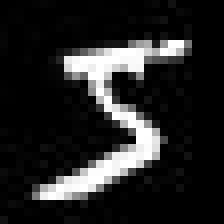

In [42]:
img

In [43]:
image.img_to_array(img).shape

(224, 224, 3)

In [44]:
# Convert the image to a numpy array
x = image.img_to_array(img)

# Expand dimensions to match the expected input shape: (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


array([[6.99352896e-08, 4.60287680e-07, 1.28521007e-08, 8.95384744e-08,
        2.60790699e-07, 1.27824649e-06, 4.90848926e-08, 6.17739744e-08,
        6.90778137e-08, 2.93213880e-08, 2.21138421e-07, 2.00952019e-08,
        1.90103755e-08, 1.28706708e-08, 8.50595185e-08, 7.27782279e-08,
        1.17608586e-07, 1.26757399e-07, 4.43622321e-06, 4.54201796e-08,
        7.41778479e-08, 2.09154322e-07, 8.57830003e-08, 4.62103031e-08,
        1.54497030e-07, 2.28313738e-07, 2.27362807e-06, 5.35337961e-07,
        2.45901475e-07, 5.27210062e-08, 2.56795172e-08, 5.74811381e-08,
        6.99227201e-07, 2.35426441e-07, 1.92359593e-07, 2.03926561e-07,
        6.61097090e-07, 5.33628146e-08, 2.10162852e-05, 2.24964708e-07,
        5.06226115e-07, 1.40370105e-06, 3.09213348e-08, 2.37991529e-07,
        9.37985689e-08, 9.20768912e-07, 2.32817801e-08, 8.76380284e-07,
        2.13112070e-08, 2.33777193e-08, 1.80099335e-07, 6.52117293e-08,
        5.40163796e-07, 6.53358029e-06, 3.00119495e-06, 1.079292

In [45]:
preds = model.predict(x)
decoded = decode_predictions(preds, top=5)[0]

for i, (imagenet_id, label, score) in enumerate(decoded):
    print(f"{i+1}. {label}: {score:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1. digital_clock: 0.6234
2. scoreboard: 0.1734
3. crossword_puzzle: 0.1570
4. digital_watch: 0.0117
5. Bouvier_des_Flandres: 0.0050


In [ ]:
Training data - Imagenet
Train the model

weight + bias - parameters - learned


Weights = "Imagenet"


Training data - Spacenet
Train the model

weight + bias - parameters - learned


Weights = "Spacenet"
